In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

In [5]:
data = pd.read_csv("water_potability.csv",sep=",")
data.head()

# RECORDAR QUE POTABILITY = 1 -> POTABLE, POTABILITY = 0 -> NO POTABLE

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [6]:
#miro los nulos
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
#no es un numero considerable, elimino las entradas nulas directamente
print(data.shape)
data_complete = data.dropna()
print(data_complete.shape)

(3276, 10)
(2011, 10)


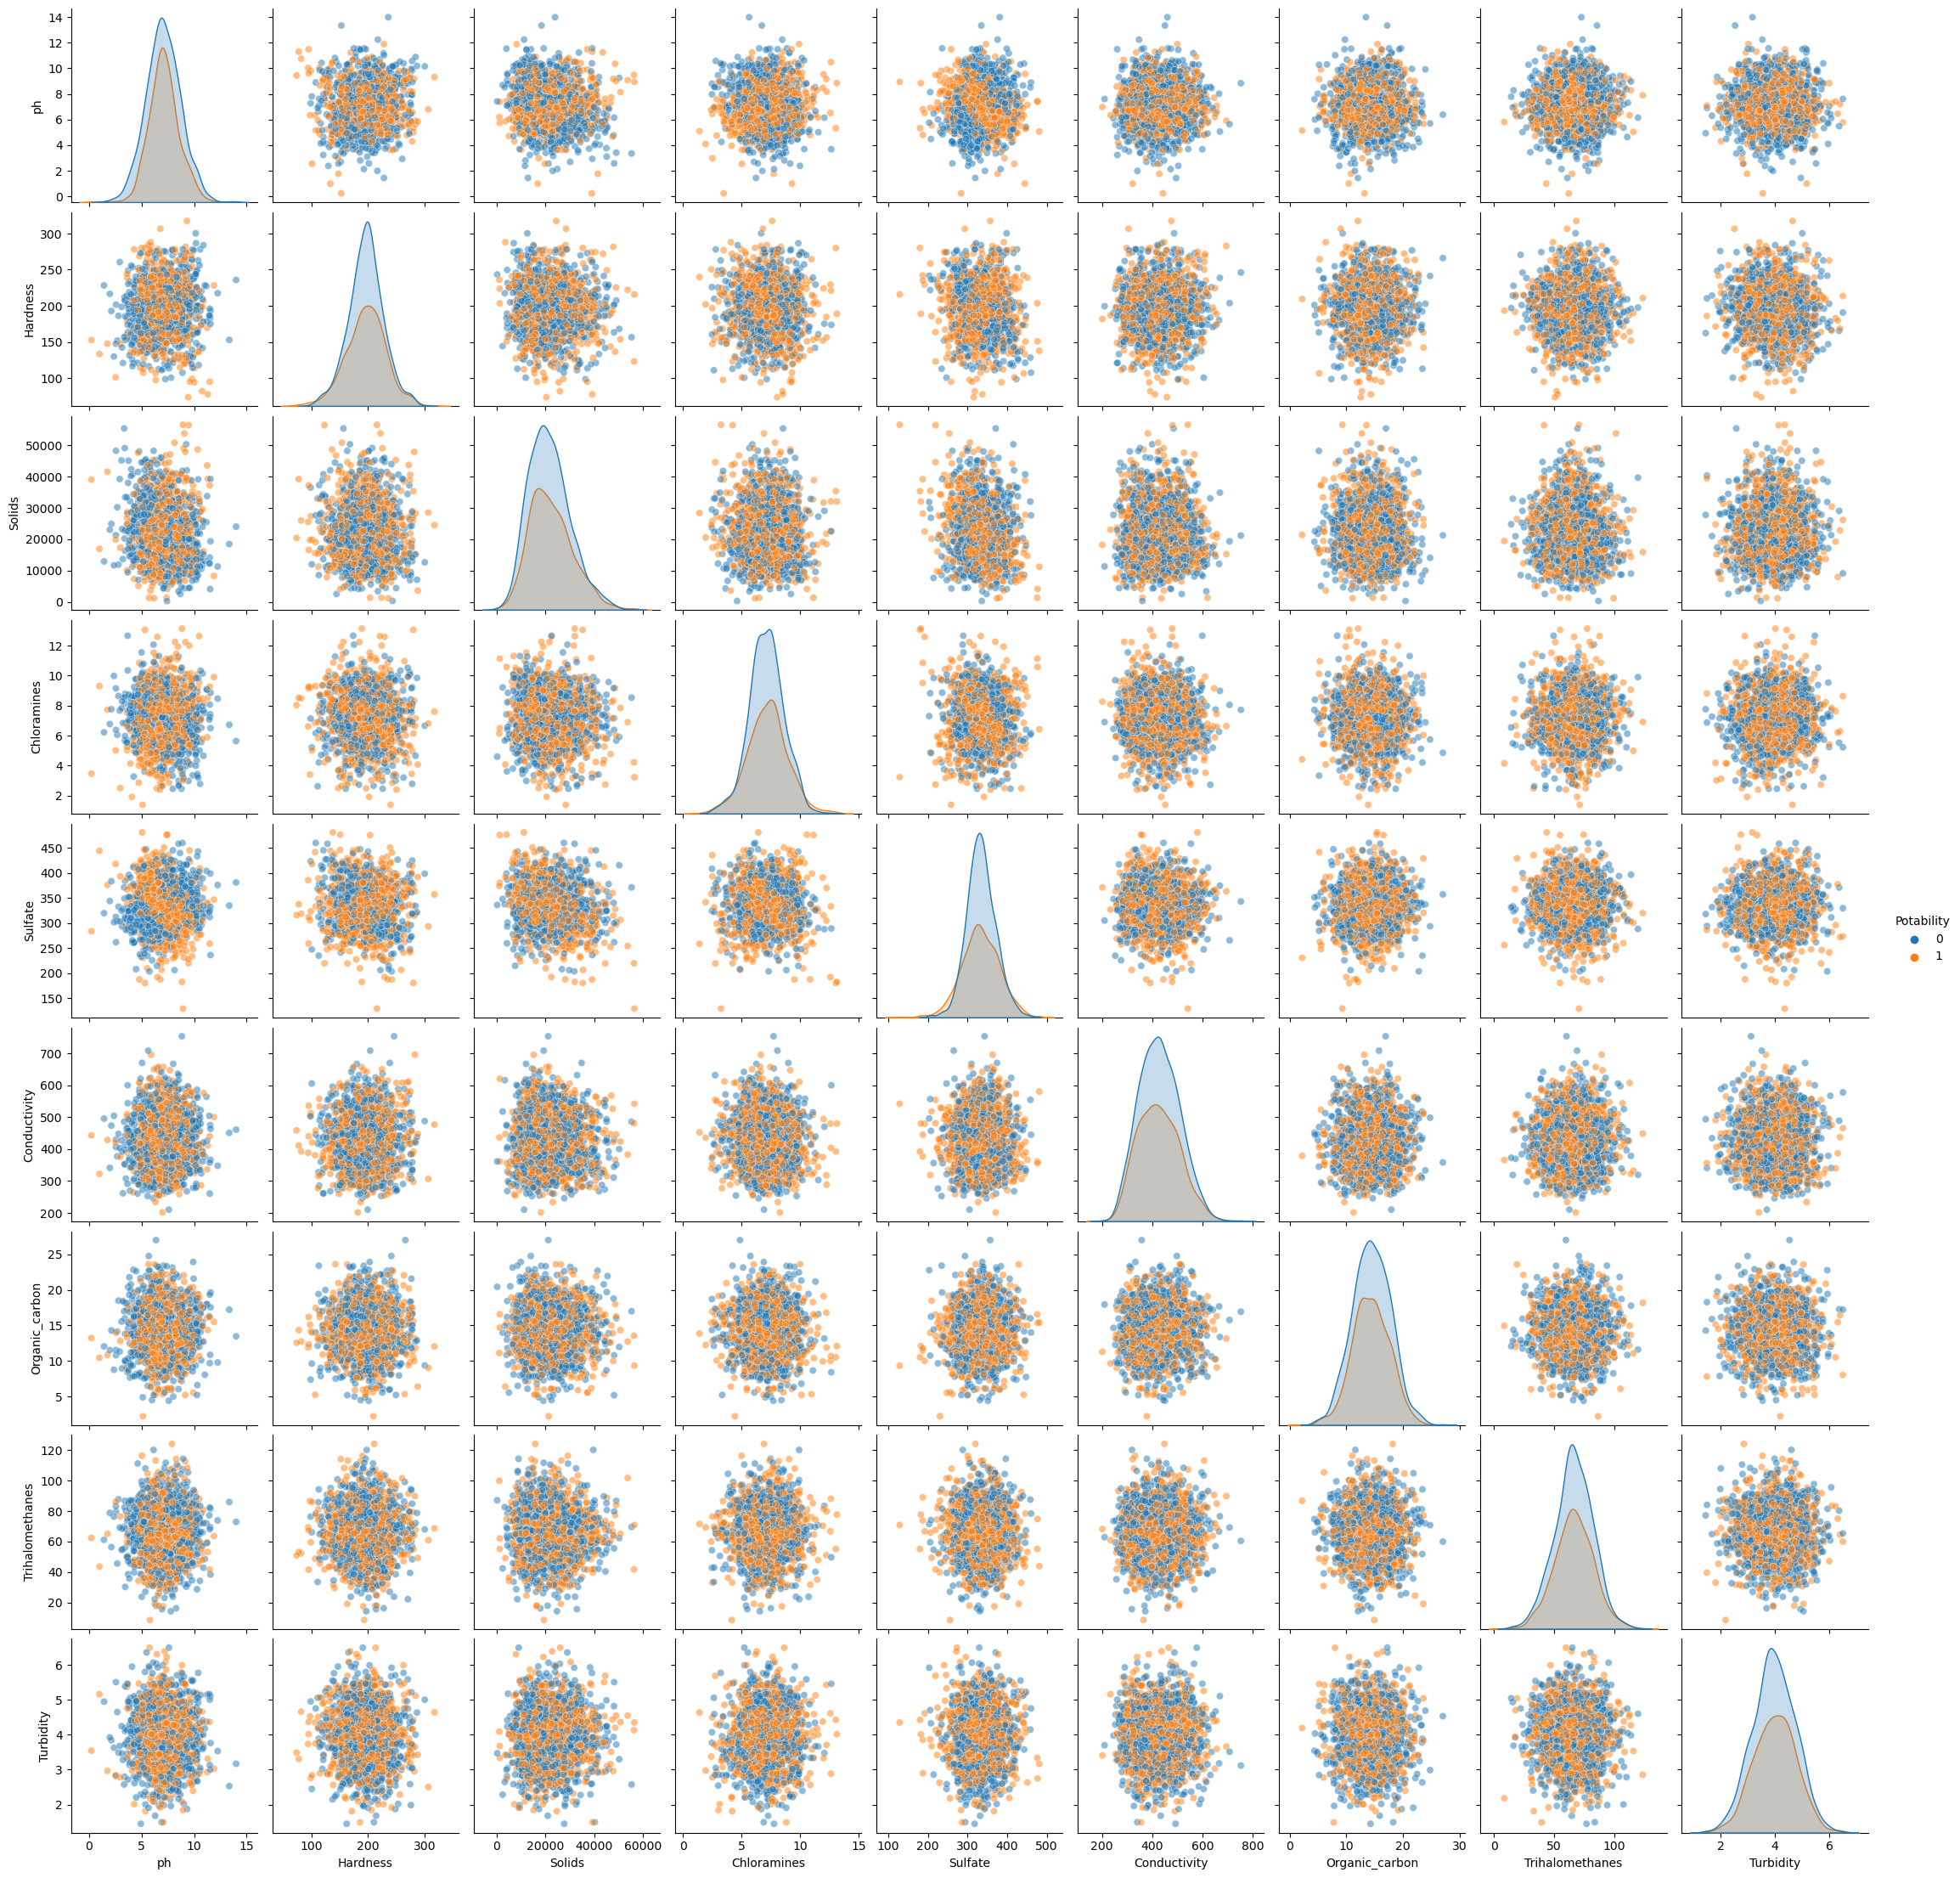

In [8]:
#grafico para encontrar relaciones y ver que variables me sirven
sns.pairplot(data=data_complete,x_vars=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity'],\
         y_vars=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity'],hue='Potability',plot_kws={'alpha': 0.5},aspect=1)

<AxesSubplot:xlabel='ph', ylabel='Sulfate'>

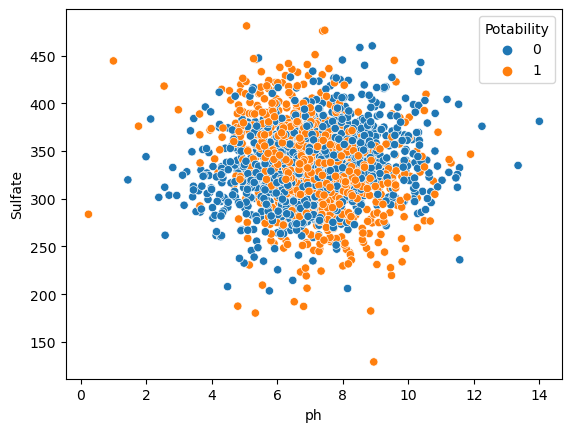

In [9]:
#hago zoom en alguno de los gráficos

sns.scatterplot(x='ph',y='Sulfate',hue='Potability',data=data_complete)

In [10]:
#voy a separar x e y y dividir train y test
cols=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']

X = data_complete[cols]
y = data_complete['Potability']

In [11]:
y.value_counts(normalize=True)

0    0.596718
1    0.403282
Name: Potability, dtype: float64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=56)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1608, 9)

(403, 9)

(1608,)

(403,)

In [13]:
#voy a estandarizar

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [14]:
#primero voy a probar un modelo KNN usando directamente GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

knn = KNeighborsClassifier()

folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)

grid = GridSearchCV(knn, param_grid, cv=folds, scoring='accuracy')

grid.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [16]:
#verifico todo

pd.DataFrame(grid.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.010599      0.002418         0.028457        0.006525   
1        0.008999      0.000895         0.011602        0.001113   
2        0.018698      0.010919         0.063403        0.040867   
3        0.016898      0.003780         0.019401        0.003828   
4        0.009497      0.001690         0.028702        0.006196   
5        0.009400      0.001497         0.013601        0.002973   
6        0.009596      0.001798         0.030103        0.006042   
7        0.015299      0.003522         0.023572        0.005429   
8        0.016399      0.006681         0.050701        0.012340   
9        0.013198      0.002855         0.017602        0.002200   
10       0.013797      0.002678         0.043901        0.006818   
11       0.013897      0.004887         0.018803        0.002674   
12       0.012898      0.004485         0.040201        0.009654   
13       0.012398      0.002199         0.019403        0.004779   
14       0.012400      0.001745         0.040300        0.008853   
15       0.011198      0.001833         0.017502        0.003528   
16       0.013099      0.002212         0.040100        0.007407   
17       0.013500      0.004456         0.020702        0.008063   
18       0.018656      0.012352         0.066403        0.034555   
19       0.010297      0.003743         0.015402        0.002872   
20       0.009697      0.002004         0.028004        0.003194   
21       0.009699      0.002572         0.017102        0.002466   
22       0.009400      0.001958         0.027801        0.003543   
23       0.010198      0.002317         0.016103        0.002626   
24       0.010399      0.002009         0.032103        0.004278   
25       0.011099      0.001760         0.020402        0.007512   
26       0.008999      0.000775         0.033500        0.010790   
27       0.017799      0.016004         0.022802        0.011658   
28       0.009499      0.000922         0.030603        0.005444   
29       0.008801      0.000980         0.015800        0.002821   
30       0.009199      0.001536         0.029800        0.004833   
31       0.010300      0.003379         0.016001        0.002141   
32       0.009100      0.001220         0.033000        0.008195   
33       0.010097      0.001447         0.016802        0.002136   
34       0.009697      0.001417         0.032002        0.005901   
35       0.010799      0.001537         0.019602        0.003800   
36       0.009499      0.000923         0.031900        0.004207   
37       0.011499      0.005314         0.017403        0.002457   
38       0.011097      0.002300         0.031502        0.004007   
39       0.009999      0.002722         0.016402        0.001561   
40       0.009298      0.001489         0.029902        0.003725   
41       0.010099      0.002210         0.018601        0.006137   
42       0.009398      0.001020         0.028900        0.004109   
43       0.009100      0.001445         0.016400        0.002333   
44       0.008896      0.000536         0.030802        0.005547   
45       0.011197      0.002926         0.017202        0.003281   
46       0.010400      0.001744         0.033597        0.006423   
47       0.010797      0.002274         0.019402        0.003467   
48       0.010599      0.001801         0.040300        0.006528   
49       0.014598      0.003775         0.024201        0.007883   
50       0.014001      0.003848         0.042299        0.006958   
51       0.011498      0.002618         0.021003        0.002146   
52       0.010999      0.002100         0.040258        0.009082   
53       0.019900      0.008299         0.035600        0.023560   
54       0.015098      0.006075         0.045702        0.006754   
55       0.015600      0.002376         0.026601        0.007117   
56       0.026698      0.014156         0.071979        0.033603   
57       0.014099      0.001869         0.023499        0.00

In [17]:
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)

KNeighborsClassifier(n_neighbors=18, weights='distance')
0.6616304347826089
{'n_neighbors': 18, 'weights': 'distance'}


In [18]:
y_pred_grid = grid.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

print (classification_report(y_test, y_pred_grid))

confusion = confusion_matrix(y_test, y_pred_grid)
print(confusion)

              precision    recall  f1-score   support

           0       0.66      0.88      0.76       237
           1       0.68      0.36      0.47       166

    accuracy                           0.67       403
   macro avg       0.67      0.62      0.61       403
weighted avg       0.67      0.67      0.64       403

[[209  28]
 [107  59]]


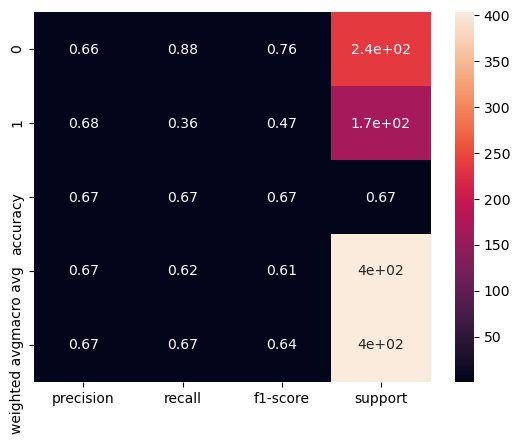

In [22]:
#Gráfica para esto:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_grid, output_dict=True) # diccionario con las métricas
df = pd.DataFrame(report).transpose() # convierte el diccionario en un dataframe
sns.heatmap(df, annot=True) # crea el mapa de calor con las métricas
plt.show()

In [25]:
    #ahora voy a probar un modelo GaussianNB
    from sklearn.preprocessing import OneHotEncoder 
    from sklearn.preprocessing import RobustScaler
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix

    gnb = GaussianNB()

    gnb.fit(X_train, y_train)

GaussianNB()

In [26]:
y_pred = gnb.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))


[[210  27]
 [120  46]]
0.6352357320099256


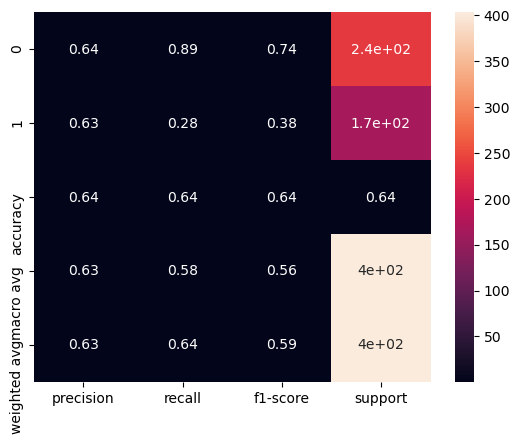

In [27]:
#para graficar el resultado
report = classification_report(y_test, y_pred, output_dict=True) # diccionario con las métricas
df = pd.DataFrame(report).transpose() # convierte el diccionario en un dataframe
sns.heatmap(df, annot=True) # crea el mapa de calor con las métricas
plt.show() 

In [28]:
#voy a probar un modelo de regresión logística usando directamente GridSearchCV
from sklearn.linear_model import LogisticRegression


knn = KNeighborsClassifier()

folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)
k_range = list(range(1, 31))
params = [
    {'C': [1, 10, 100, 1000],
     'penalty': ['l1', 'l2',],
     'solver': ['saga']}]


grid = GridSearchCV(LogisticRegression(), params, cv=folds, scoring='accuracy')

grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=LogisticRegression(),
             param_grid=[{'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2'],
                          'solver': ['saga']}],
             scoring='accuracy')

In [29]:
    y_preds_log=grid.predict(X_test)

In [30]:
confusion_matrix(y_test, y_preds_log)

array([[237,   0],
       [166,   0]], dtype=int64)

In [24]:
print(data_complete.shape)

(2011, 10)


In [25]:
print(data_complete.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [26]:
# Borro la columna Potability para realizar un abordaje no supervisado y comparar los resultados, sabiendo que tengo 2 clusters.
df_for_no_supervised = data_complete.drop(['Potability'], axis=1)

df_for_no_supervised.head(5)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   

   Organic_carbon  Trihalomethanes  Turbidity  
3       18.436524       100.341674   4.628771  
4       11.558279        31.997993   4.075075  
5        8.399735        54.917862   2.559708  
6       13.789695        84.603556   2.672989  
7       12.363817        62.798309   4.401425

In [27]:
# Voy a utilizar K-Means primero

scaler=StandardScaler()
X_scaled=scaler.fit_transform(df_for_no_supervised)
np.set_printoptions(suppress=True)
[X_scaled[i] for i in range(2)]

from sklearn.cluster import KMeans
# Numero de repeticiones=10
kmeans = KMeans(n_clusters=2,n_init=10,random_state=0)
kmeans.fit(X_scaled)
labels = kmeans.labels_ 
centroids = kmeans.cluster_centers_

clusters = pd.DataFrame(labels, columns=['Cluster'])

columns = [data_complete, clusters]
result_kmeans = pd.concat(columns, axis=1)

result_kmeans['Cluster'] = result_kmeans['Cluster'].replace({0: 1, 1: 0})

print(result_kmeans['Potability'].value_counts(), 'SET ORIGINAL')
print(result_kmeans['Cluster'].value_counts(), 'CLUSTERING KMEANS')

# ahora quiero checkear por cada cluster de kmeans, que porcentaje acerto

test_0 = result_kmeans['Cluster'] == 0

result_0 = ((result_kmeans[test_0]['Potability'] == 0)).sum()
print(result_0)
print('correctamente no potables')
print(((result_0/(result_kmeans['Potability'] == 0).sum()) * 100).round())
print('porcentaje no potables')


# ahora quiero checkear por cada cluster de kmeans, que porcentaje acerto

test_1 = result_kmeans['Cluster'] == 1

result_1 = ((result_kmeans[test_1]['Potability'] == 1)).sum()
print(result_1)
print('correctamente potables')
print(((result_1/(result_kmeans['Potability'] == 1).sum()) * 100).round())
print('porcentaje potables')

0.0    1200
1.0     811
Name: Potability, dtype: int64 SET ORIGINAL
0.0    1044
1.0     967
Name: Cluster, dtype: int64 CLUSTERING KMEANS
415
correctamente no potables
35.0
porcentaje no potables
240
correctamente potables
30.0
porcentaje potables


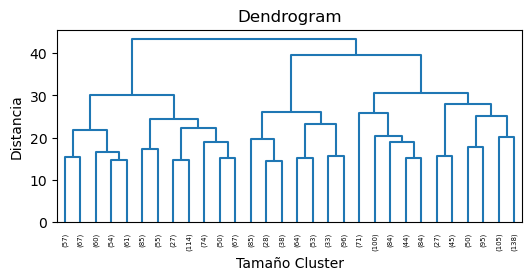

In [28]:
# Utilizo el metodo de clustering jerarquico
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
Z = linkage(X_scaled, 'ward'); # indica el tipo de linkage
plt.figure(figsize=[6,2.5]); 
plt.title('Dendrogram'); 
plt.xlabel('Tamaño Cluster'); 
plt.ylabel('Distancia')

dendrogram(Z,
           leaf_rotation=90., leaf_font_size=5.,  
           color_threshold=0, truncate_mode='lastp' )
plt.show()  



In [32]:
labels_j=fcluster(Z,2,criterion='maxclust');
clusters_j = pd.DataFrame(labels_jerar, columns=['Cluster_J'])

columns = [data_complete, clusters_j]
result_j = pd.concat(columns, axis=1)

result_j['Cluster_J'] = result_j['Cluster_J'].replace({1: 1, 2: 0})

print(result_j['Potability'].value_counts(), 'SET ORIGINAL')
print(result_j['Cluster_J'].value_counts(), 'CLUSTERING JERARQUICO')

# ahora quiero checkear por cada cluster de kmeans, que porcentaje acerto

test_0 = result_j['Cluster_J'] == 0

result_0 = ((result_j[test_0]['Potability'] == 0)).sum()
print(result_0)
print('correctamente no potables')
print(((result_0/(result_j['Potability'] == 0).sum()) * 100).round())
print('porcentaje no potables')


# ahora quiero checkear por cada cluster de kmeans, que porcentaje acerto

test_1 = result_j['Cluster_J'] == 1

result_1 = ((result_j[test_1]['Potability'] == 1)).sum()
print(result_1)
print('correctamente potables')
print(((result_1/(result_j['Potability'] == 1).sum()) * 100).round())
print('porcentaje potables')

NameError: name 'fcluster' is not defined

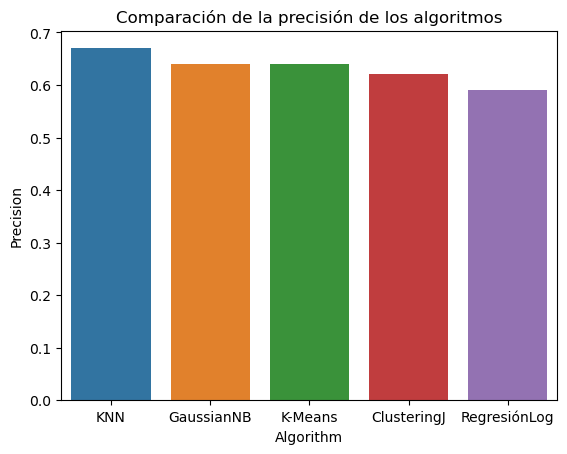

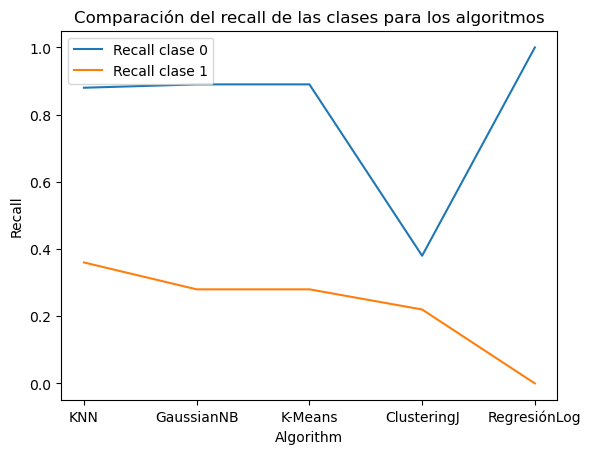

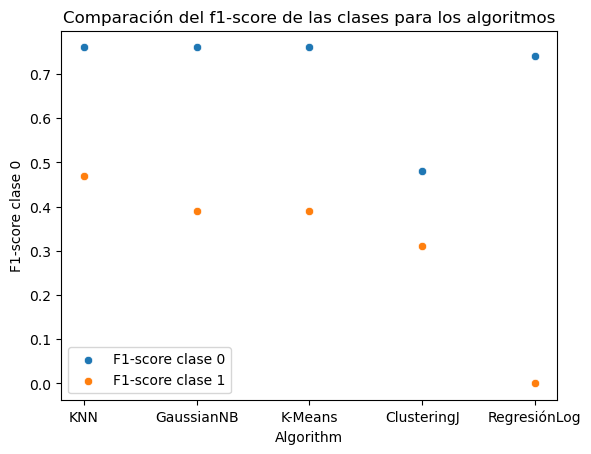

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un diccionario con los nombres y los valores de las métricas para cada algoritmo
results = {
    "Algorithm": ["KNN", "GaussianNB", "K-Means", "ClusteringJ", "RegresiónLog"],
    "Precision": [0.67, 0.64, 0.64, 0.62, 0.59],
    "Recall clase 0": [0.88, 0.89, 0.89, 0.38, 1.00],
    "Recall clase 1": [0.36, 0.28, 0.28, 0.22, 0.00],
    "F1-score clase 0": [0.76, 0.76, 0.76, 0.48, 0.74],
    "F1-score clase 1": [0.47, 0.39, 0.39, 0.31, 0.00]
}

# Crear un dataframe a partir del diccionario usando pandas
df = pd.DataFrame(results)

# Crear un gráfico de barras usando seaborn para comparar la precisión de cada algoritmo
sns.barplot(x="Algorithm", y="Precision", data=df)
plt.title("Comparación de la precisión de los algoritmos")
plt.show()

# Crear un gráfico de líneas usando matplotlib para comparar el recall de cada clase para cada algoritmo
plt.plot(df["Algorithm"], df["Recall clase 0"], label="Recall clase 0")
plt.plot(df["Algorithm"], df["Recall clase 1"], label="Recall clase 1")
plt.title("Comparación del recall de las clases para los algoritmos")
plt.xlabel("Algorithm")
plt.ylabel("Recall")
plt.legend()
plt.show()

# Crear un gráfico de puntos usando seaborn para comparar el f1-score de cada clase para cada algoritmo
sns.scatterplot(x="Algorithm", y="F1-score clase 0", data=df, label="F1-score clase 0")
sns.scatterplot(x="Algorithm", y="F1-score clase 1", data=df, label="F1-score clase 1")
plt.title("Comparación del f1-score de las clases para los algoritmos")
plt.legend()
plt.show()